# Neuronales Netz

## One-Hot-Encoding

In [22]:
import numpy as np
from numpy import load
from scipy.special import expit
from sklearn.preprocessing import OneHotEncoder
import pickle
import matplotlib.pyplot as plt

# load numpy array from npy file

X_train=load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32) * 1.0/255.0 # normalisieren
y_train=load('../01_Dataset/dataset_28x28/y_train.npy')
X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32) * 1.0/255.0  # normalisieren
y_test=load('../01_Dataset/dataset_28x28/y_test.npy')

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

# one-hot-encoding
oh = OneHotEncoder()
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()

(6421, 28, 28, 1)
6421
(2753, 28, 28, 1)
2753


Label y_train: 1
Label y_train (One-Hot-Encoded): [0. 1. 0. 0. 0.]


<function matplotlib.pyplot.show(close=None, block=None)>

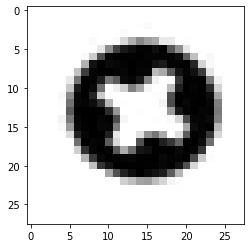

In [23]:
# label check
i=5
print("Label y_train: " + str(y_train[i]))
print("Label y_train (One-Hot-Encoded): " + str(y_train_oh[i]))
plt.imshow(X_train[i],cmap='gray')
plt.show

# Kategorien:
# 0: innensechskant
# 1: philips
# 2: pozidriv
# 3: sechskant
# 4: torx

In [11]:
X_train = X_train.astype(np.float32).reshape(-1, 784) # reshape hier wegen label test
X_test  = X_test.astype(np.float32).reshape(-1, 784) #
y_test = y_test.astype(np.int32)

print(X_train)
print(X_test.shape)
print(y_test)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(2753, 784)
[3 0 1 ... 1 0 3]


## Neuronales Netz

In [12]:
# Quelle: Jannis Seemann , Udemy-Kurs Deep Learning
class NeuralNetwork(object):
    def __init__(self, lr = 0.01):
        self.lr = lr

        self.w0 = np.random.randn(100, 784)
        self.w1 = np.random.randn(5, 100)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))

model = NeuralNetwork()

for i in range(0, 500):
    for j in range(0, len(X_train), 100):
        model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])

    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    print(np.mean(y_test_pred == y_test))

0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.20232473665092626
0.2026879767526335
0.1914275335997094
0.17689792953142028
0.17580820922629858
0.17108608790410462
0.17253904831093353
0.17653468942971304
0.17835088993824919
0.1787141300399564
0.1808935706501998
0.18307301126044315
0.1848892117689793
0.185978932074101
0.18815837268434435
0.18888

## Mehrere Ausgänge

In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical

from numpy import load
import matplotlib.pyplot as plt

X_train = load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_train = load('../01_Dataset/dataset_28x28/y_train.npy').astype(np.int32)

X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_test=load('../01_Dataset/dataset_28x28/y_test.npy').astype(np.int32)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(5, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=100)


Epoch 1/100
65/65 [==============================] - 0s 3ms/step - loss: 1.5785 - accuracy: 0.2179
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 1.4458 - accuracy: 0.5010
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 1.3253 - accuracy: 0.6337
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 1.2080 - accuracy: 0.6566
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 1.1071 - accuracy: 0.6753
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 1.0270 - accuracy: 0.6887
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 0.9640 - accuracy: 0.7080
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 0.9130 - accuracy: 0.7156
Epoch 9/100
65/65 [==============================] - 0s 3ms/step - loss: 0.8719 - accuracy: 0.7273
Epoch 10/100
65/65 [==============================] - 0s 3ms/step - loss: 0.8358 - accuracy: 0.7331
Epoch 11/

87/87 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8467
[1. 0. 0. 0. 0.]


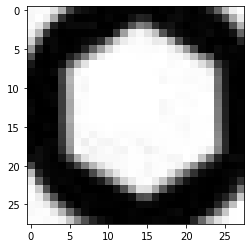

NameError: name 'pred' is not defined

In [15]:

model.evaluate(X_test.reshape(-1, 784), y_test)
model.predict(X_test.reshape(-1, 784))

%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1].reshape(28,28), cmap="gray")
plt.show()

np.argmax(pred[1])


In [16]:

# Kategorien:
# 0: innensechskant
# 1: philips
# 2: pozidriv
# 3: sechskant
# 4: torx

count=0
for i in range(0, len(X_test)):
    # wenn pozidriv vorhergesagt wurde und die richtige Klasse Philips gewesen ist:
    if y_test_pred[i] == 2 and y_test[i] ==1:
        count += 1
        # zeige die Bilder an
        plt.imshow(X_test[i].reshape(28, 28))
        plt.show()
        print(count)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


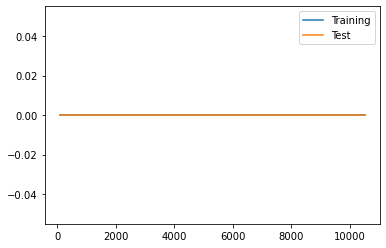

In [17]:
class NeuralNetwork(object):
    def __init__(self, lr = 0.1):
        self.lr = lr

        self.w0 = np.random.randn(100, 784)
        self.w1 = np.random.randn(5, 100)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))

limits = [100, 1000, 3000, 9000, 10500]
test_accs = []
train_accs = []
for limit in limits:
    model = NeuralNetwork(0.25)

    for i in range(0, 100):
        for j in range(0, limit, 100):
           model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])


    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    test_acc = np.mean(y_test_pred == y_test)

    y_train_pred = model.predict(X_train / 255.)
    y_train_pred = np.argmax(y_train_pred, axis=0)
    train_acc = np.mean(y_train_pred == y_train)

    test_accs.append(test_acc)
    train_accs.append(train_acc)



plt.plot(limits, train_accs, label="Training")
plt.plot(limits, test_accs, label="Test")

plt.legend()
plt.show()

C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


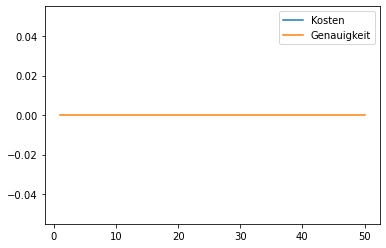

In [18]:
class NeuralNetwork(object):
    def __init__(self, lr = 0.1):
        self.lr = lr

        self.w0 = np.random.randn(100, 784)
        self.w1 = np.random.randn(5, 100)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))


model = NeuralNetwork()

epochs = []
costs = []
accs = []

for i in range(0, 50):
    for j in range(0, 10500, 100):
        model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])

    cost = model.cost(model.predict(X_train), y_train_oh)

    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    acc = np.mean(y_test_pred == y_test)

    epochs.append(i + 1)
    costs.append(cost)
    accs.append(acc)


import matplotlib.pyplot as plt


plt.plot(epochs, costs, label="Kosten")
plt.plot(epochs, accs, label="Genauigkeit")
plt.legend()
plt.show()

In [19]:

class NeuralNetwork(object):
    def __init__(self, lr = 0.1, hidden_size = 100):
        self.lr = lr

        self.w0 = np.random.randn(hidden_size, 784)
        self.w1 = np.random.randn(5, hidden_size)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))

for hidden_size in [500, 600, 700, 800]:

    model = NeuralNetwork(0.3, hidden_size)

    for i in range(0, 25):
        for j in range(0, 10500, 100):
            model.train(X_train[j:(j + 100), :] / 255., y_train_oh[j:(j + 100), :])

        # cost = model.cost(model.predict(X_train), y_train_oh)

    y_test_pred = model.predict(X_test / 255.)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    acc = np.mean(y_test_pred == y_test)

    print(str(hidden_size) + ": " + str(acc))
    

C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Martin\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


500: 0.0
600: 0.0
700: 0.0
800: 0.0
